In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

In [3]:
NUM_CLASSES = 29

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        11,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 29)             │           957 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,989 (472.61 KB)

 Trainable params: 120,989 (472.61 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks = [cp_callback, es_callback]
)

Epoch 1/1000
553/554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2561 - loss: 2.4921
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
554/554 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2566 - loss: 2.4900 - val_accuracy: 0.7469 - val_loss: 0.8821
Epoch 2/1000
537/554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5845 - loss: 1.2857
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
554/554 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5852 - loss: 1.2835 - val_accuracy: 0.7862 - val_loss: 0.7327
Epoch 3/1000
537/554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6595 - loss: 1.0649
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
554/554 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6599 - loss: 1.0639 - val_accuracy: 0.8153 - val_loss: 0.6105
Epoch 4/1000
549/554 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7100 - loss: 0.9313
Epoch 4: saving model to model/keypoint_classifier/keypoint_classi

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9016 - loss: 0.4059


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[1.35650935e-11 6.83340602e-08 2.55428688e-07 9.99973416e-01
 1.55408775e-09 1.92366159e-07 3.80187011e-08 9.62915223e-08
 3.14168142e-06 2.81597967e-09 1.08741112e-07 2.01100520e-05
 3.48464535e-10 1.59249159e-11 8.79661798e-07 3.73210213e-10
 4.41001703e-07 3.73246735e-07 2.53056395e-11 1.42430965e-08
 1.29181913e-07 6.06452545e-07 1.50143240e-08 3.94102528e-08
 2.85040862e-08 3.30277194e-10 3.56687480e-09 6.26747206e-15
 2.92577305e-08]
3


# Confusion matrix

738/738 ━━━━━━━━━━━━━━━━━━━━ 1s 867us/step


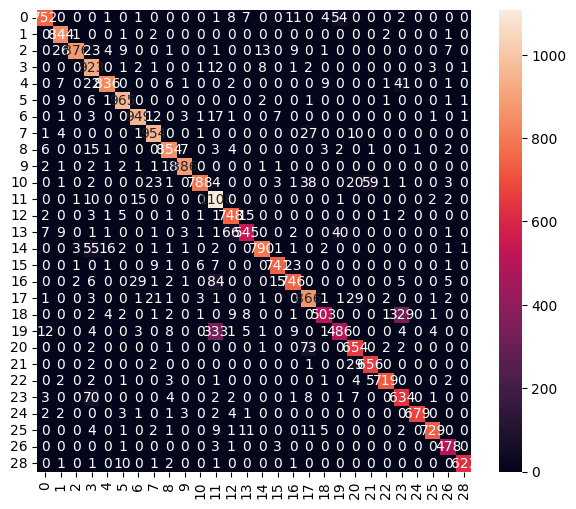

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       841
           1       0.93      0.99      0.96       851
           2       0.99      0.90      0.94       970
           3       0.80      0.97      0.87       955
           4       0.96      0.90      0.93       926
           5       0.96      0.98      0.97       987
           6       0.95      0.95      0.95       996
           7       0.92      0.96      0.94       998
           8       0.94      0.95      0.95       899
           9       0.98      0.97      0.97       916
          10       0.98      0.83      0.90       945
          11       0.70      0.97      0.81      1139
          12       0.88      0.96      0.92       780
          13       0.92      0.80      0.86       678
          14       0.97      0.90      0.93       877
          15       0.96      0.94      0.95       790
          16       0.93      0.83      0.88       896
     

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Vishy\AppData\Local\Temp\tmpnitugrny\assets


INFO:tensorflow:Assets written to: C:\Users\Vishy\AppData\Local\Temp\tmpnitugrny\assets


Saved artifact at 'C:\Users\Vishy\AppData\Local\Temp\tmpnitugrny'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 29), dtype=tf.float32, name=None)
Captures:
  3164792068944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3164792069520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3164792066256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3164792064528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3164792070288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3164873058704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3164873056400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3164873055632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3164873056208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3164873053520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3164873052368:

138232

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 6.01 ms


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.5532733e-11 7.8914056e-08 2.7587532e-07 9.9997091e-01 1.8165304e-09
 2.0697664e-07 4.2987640e-08 1.0768634e-07 3.5476053e-06 3.2671454e-09
 1.2058734e-07 2.2035791e-05 3.9466896e-10 1.8816559e-11 9.0974504e-07
 4.3326487e-10 4.7391754e-07 4.1764363e-07 2.9594643e-11 1.5836031e-08
 1.4193600e-07 6.6304136e-07 1.7117019e-08 4.2839488e-08 3.1489805e-08
 3.9043271e-10 3.8823411e-09 7.7565060e-15 3.2887801e-08]
3
